In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy
from scipy.integrate import odeint
import scipy

#Control

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


Text(0, 0.5, 'Quimioterapia')

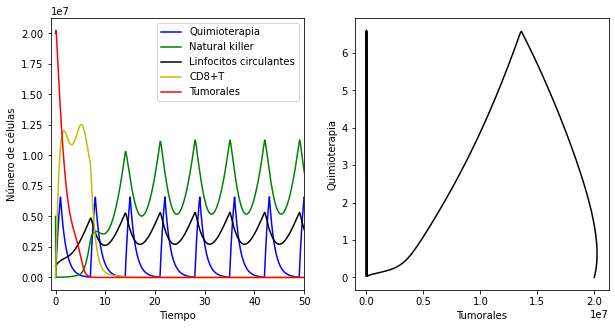

In [ ]:
a, b, c, d, e, l, f1, g, h, j, k, m, q, p, s, r1, r2, u, alpha, beta, gamma, pi, gi, mui = 4.31e-1, 1.02e-9, 6.41e-11, 2.34, 2.08e-7, 2.09, 4.12e-2, 1.25e-2, 2.02e7, 2.49e-2, 3.66e7, 2.04e-1, 1.42e-6, 3.42e-6, 8.39e-2, 1.10e-7, 6.50e-11, 3.00e-10, 7.50e8, 1.20e-2, 9.00e-1, 1.25e-1, 2.00e7, 1.00e1
kt = 9.00e-1
kn = 6e-1
kc = 6e-1

def f(TMNCL, t):
  T, M, N, C, L = TMNCL
  vm = 0
 ############################################ 
  tau=1.0; fs = 100; t0 = 0 
    
  if t <= 365:  
    if np.mod(t-t0,7) <= tau and np.mod(t-t0,1) >=0:
      vm = 10

  D = d*(L/T)**l / (s + (L/T)**l)
  return[a*T*(1 - b*T) - c*N*T - D*T - kt*(1 - np.exp(-M))*T, 
         -gamma*M + vm,
         e*C + g*N*T**2/(h + T**2) - f1*N - p*N*T - kn*(1 - np.exp(-M))*N,
         alpha - beta*C - kc*C*(1 - np.exp(-M)),
         -m*L + j*D**2*T**2*L / (k + D**2*T**2) +(r1*N + r2*C)*T - u*N*L**2 - kt*(1 - np.exp(-M))*L ]


xy0 = [2e7, 0, 1e3, 6e8, 10]
t = np.linspace(0, 120., 10000)
xy_t = integrate.odeint(f, xy0, t)
xy_t.shape

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(t, xy_t[:, 1]*0.1e7, 'b', label="Quimioterapia")
axes[0].plot(t, xy_t[:, 2]*0.5e4, 'g', label="Natural killer")
axes[0].plot(t, xy_t[:, 3]*0.015e-1, 'k', label="Linfocitos circulantes")
axes[0].plot(t, xy_t[:, 4]*0.02e3, 'y', label="CD8+T")
axes[0].plot(t, xy_t[:, 0], 'r', label="Tumorales")
axes[0].set_xlabel("Tiempo")
axes[0].set_ylabel("Número de células")
axes[0].legend()
axes[0].set_xlim(-1, 50)
#axes[0].set_ylim(-1, 5.5e7)


axes[1].plot(xy_t[:,0], xy_t[:,1], 'k')
axes[1].set_xlabel("Tumorales")
axes[1].set_ylabel("Quimioterapia")

#Implementación del sistema De Depillis 2006

Text(0, 0.5, 'Quimioterapia')

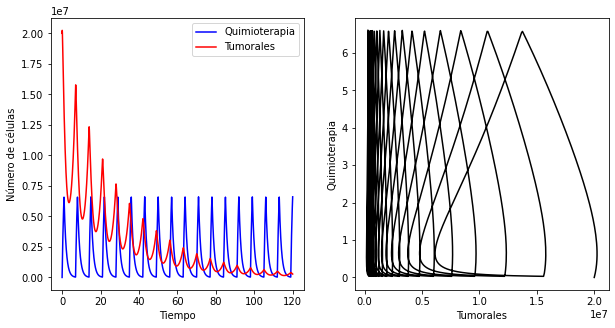

In [ ]:
a, b, c, d, e, l, f, g, h, j, k, m, q, p, s, r1, r2, u, alpha, beta, gamma, pi, gi, mui = 4.31e-1, 1.02e-9, 6.41e-11, 2.34, 2.08e-7, 2.09, 4.12e-2, 1.25e-2, 2.02e7, 2.49e-2, 3.66e7, 2.04e-1, 1.42e-6, 3.42e-6, 8.39e-2, 1.10e-7, 6.50e-11, 3.00e-10, 7.50e8, 1.20e-2, 9.00e-1, 1.25e-1, 2.00e7, 1.00e1
kt = 9.00e-1
def f(TM, t):
  T, M = TM
  vm = 0
 ############################################ x = T ; y = M 
  tau=1.0; fs = 100; t0 = 0 
    
  if t <= 365:  
    if np.mod(t-t0,7) <= tau and np.mod(t-t0,1) >=0:
      vm = 10
  return[a*T*(1 - b*T) - kt*(1 - np.exp(-M))*T,
         -gamma*M + vm]

xy0 = [2e7, 0]
t = np.linspace(0, 120., 10000)
xy_t = integrate.odeint(f, xy0, t)
xy_t.shape

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(t, xy_t[:, 1]*0.1e7, 'b', label="Quimioterapia")
axes[0].plot(t, xy_t[:, 0], 'r', label="Tumorales")
axes[0].set_xlabel("Tiempo")
axes[0].set_ylabel("Número de células")
axes[0].legend()
#axes[0].set_xlim(-1, 10)
#axes[0].set_ylim(-1, 3.5e7)

axes[1].plot(xy_t[:,0], xy_t[:,1], 'k')
axes[1].set_xlabel("Tumorales")
axes[1].set_ylabel("Quimioterapia")

#Implementación del sistema De Depillis 2006 con células Natural Killer

Text(0, 0.5, 'Quimioterapia')

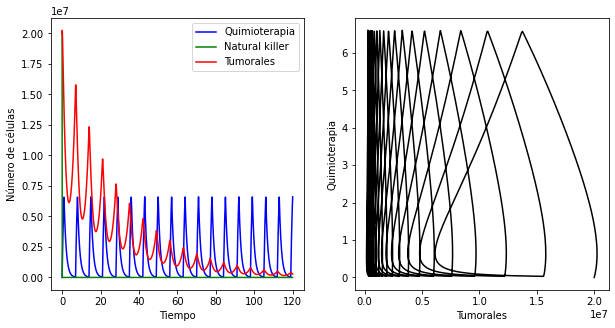

In [ ]:
a, b, c, d, e, l, f1, g, h, j, k, m, q, p, s, r1, r2, u, alpha, beta, gamma, pi, gi, mui = 4.31e-1, 1.02e-9, 6.41e-11, 2.34, 2.08e-7, 2.09, 4.12e-2, 1.25e-2, 2.02e7, 2.49e-2, 3.66e7, 2.04e-1, 1.42e-6, 3.42e-6, 8.39e-2, 1.10e-7, 6.50e-11, 3.00e-10, 7.50e8, 1.20e-2, 9.00e-1, 1.25e-1, 2.00e7, 1.00e1
kt = 9.00e-1
kn = 6e-1

def f(TMN, t):
  T, M, N = TMN
  vm = 0
 ############################################ 
  tau=1.0; fs = 100; t0 = 0 
    
  if t <= 365:  
    if np.mod(t-t0,7) <= tau and np.mod(t-t0,1) >=0:
      vm = 10
  return[a*T*(1 - b*T) - c*N*T - kt*(1 - np.exp(-M))*T, 
         -gamma*M + vm,
         g*N*T**2/(h + T**2) - f1*N - p*N*T - kn*(1 - np.exp(-M))*N ]

xy0 = [2e7, 0, 1e3]
t = np.linspace(0, 120., 10000)
xy_t = integrate.odeint(f, xy0, t)
xy_t.shape

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(t, xy_t[:, 1]*0.1e7, 'b', label="Quimioterapia")
axes[0].plot(t, xy_t[:, 2]*0.2e5, 'g', label="Natural killer")
axes[0].plot(t, xy_t[:, 0], 'r', label="Tumorales")
axes[0].set_xlabel("Tiempo")
axes[0].set_ylabel("Número de células")
axes[0].legend()
#axes[0].set_xlim(-1, 1)
#axes[0].set_ylim(-1, 5.5e7)

axes[1].plot(xy_t[:,0], xy_t[:,1], 'k')
axes[1].set_xlabel("Tumorales")
axes[1].set_ylabel("Quimioterapia")

#Implementación del sistema De Depillis 2006 con células Natural Killer y linfocitos circulantes

Text(0, 0.5, 'Quimioterapia')

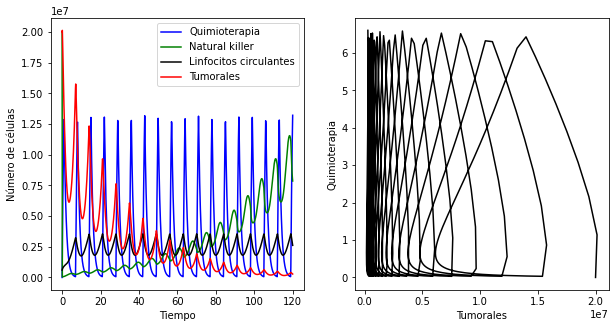

In [ ]:
a, b, c, d, e, l, f1, g, h, j, k, m, q, p, s, r1, r2, u, alpha, beta, gamma, pi, gi, mui = 4.31e-1, 1.02e-9, 6.41e-11, 2.34, 2.08e-7, 2.09, 4.12e-2, 1.25e-2, 2.02e7, 2.49e-2, 3.66e7, 2.04e-1, 1.42e-6, 3.42e-6, 8.39e-2, 1.10e-7, 6.50e-11, 3.00e-10, 7.50e8, 1.20e-2, 9.00e-1, 1.25e-1, 2.00e7, 1.00e1
kt = 9.00e-1
kn = kc = 6e-1

def f(TMNC, t):
  T, M, N, C = TMNC
  vm = 0
 ############################################ 
  tau=1.0; fs = 100; t0 = 0 
    
  if t <= 365:  
    if np.mod(t-t0,7) <= tau and np.mod(t-t0,1) >=0:
      vm = 10
  return[a*T*(1 - b*T) - c*N*T - kt*(1 - np.exp(-M))*T, 
         -gamma*M + vm,
         e*C + g*N*T**2/(h + T**2) - f1*N - p*N*T - kn*(1 - np.exp(-M))*N,
         alpha - beta*C - kc*C*(1 - np.exp(-M)) ]


xy0 = [2e7, 0, 1e3, 6e8]
t = np.linspace(0, 120., 1000)
xy_t = integrate.odeint(f, xy0, t)
xy_t.shape

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(t, xy_t[:, 1]*0.2e7, 'b', label="Quimioterapia")
axes[0].plot(t, xy_t[:, 2]*0.2e5, 'g', label="Natural killer")
axes[0].plot(t, xy_t[:, 3]*0.1e-2, 'k', label="Linfocitos circulantes")
axes[0].plot(t, xy_t[:, 0], 'r', label="Tumorales")
axes[0].set_xlabel("Tiempo")
axes[0].set_ylabel("Número de células")
axes[0].legend()
#axes[0].set_xlim(-1, 10)
#axes[0].set_ylim(-1, 5.5e7)


axes[1].plot(xy_t[:,0], xy_t[:,1], 'k')
axes[1].set_xlabel("Tumorales")
axes[1].set_ylabel("Quimioterapia")

#Simulación de sistema reducido y simplificado

Text(0, 0.5, 'Quimioterapia')

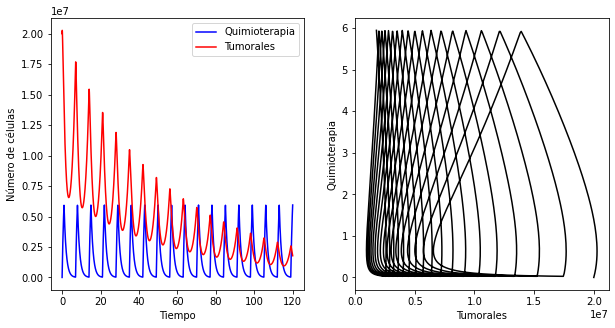

In [ ]:
a, b, c, d, e, l, f, g, h, j, k, m, q, p, s, r1, r2, u, alpha, beta, gamma, pi, gi, mui = 4.31e-1, 1.02e-9, 6.41e-11, 2.34, 2.08e-7, 2.09, 4.12e-2, 1.25e-2, 2.02e7, 2.49e-2, 3.66e7, 2.04e-1, 1.42e-6, 3.42e-6, 8.39e-2, 1.10e-7, 6.50e-11, 3.00e-10, 7.50e8, 1.20e-2, 9.00e-1, 1.25e-1, 2.00e7, 1.00e1
kt = 9.00e-1
def f(TM, t):
  T, M = TM
  vm = 0
 ############################################ x = T ; y = M 
  tau=1.0; fs = 100; t0 = 0 
    
  if t <= 365:  
    if np.mod(t-t0,7) <= tau and np.mod(t-t0,1) >=0:
      vm = 9
  return[a*T*(1 - b*T) - kt*(1 - np.exp(-M))*T,
         -gamma*M + vm]

xy0 = [2e7, 0]
t = np.linspace(0, 120., 10000)
xy_t = integrate.odeint(f, xy0, t)
xy_t.shape

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(t, xy_t[:, 1]*0.1e7, 'b', label="Quimioterapia")
axes[0].plot(t, xy_t[:, 0], 'r', label="Tumorales")
axes[0].set_xlabel("Tiempo")
axes[0].set_ylabel("Número de células")
axes[0].legend()
#axes[0].set_xlim(-1, 10)
#axes[0].set_ylim(-1, 3.5e7)

axes[1].plot(xy_t[:,0], xy_t[:,1], 'k')
axes[1].set_xlabel("Tumorales")
axes[1].set_ylabel("Quimioterapia")